Import dependencies

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Load data

In [10]:
data: pd.DataFrame = pd.read_excel(io=r"C:\Users\marcu\Documents\Professional\Quantitative Trading Firm Base Salaries.xlsx")
data = data.set_index(keys="Firm")
data

,Low,Mid,High
Firm,,,
Akuna,130,165.0,200
AQR,140,147.5,155
Aquatic,150,225.0,300
Balyasny,150,175.0,200
Belvedere,150,175.0,200
Blackstone,160,205.0,250
Bridgewater,150,175.0,200
Citadel,200,250.0,300
Citadel Securities,175,262.5,350


Plot data

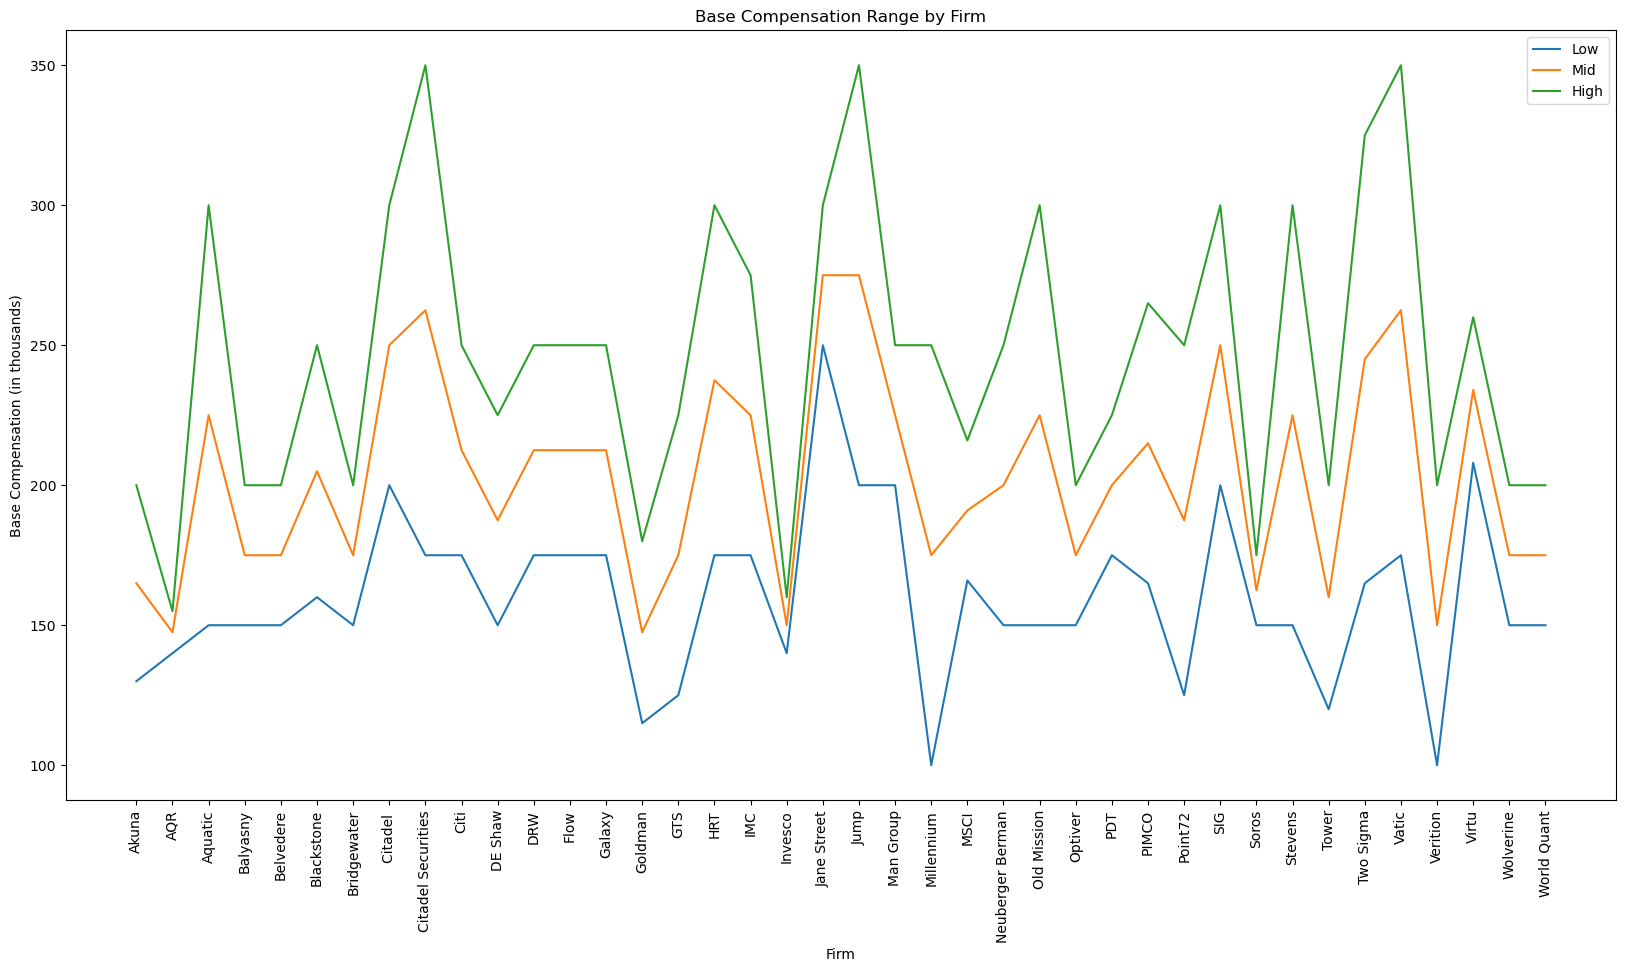

In [85]:
data.plot(figsize=(20, 10), ylabel="Base Compensation (in thousands)", title="Base Compensation Range by Firm")
plt.xticks(ticks=range(len(data.index)), labels=data.index, rotation=90)
plt.show()

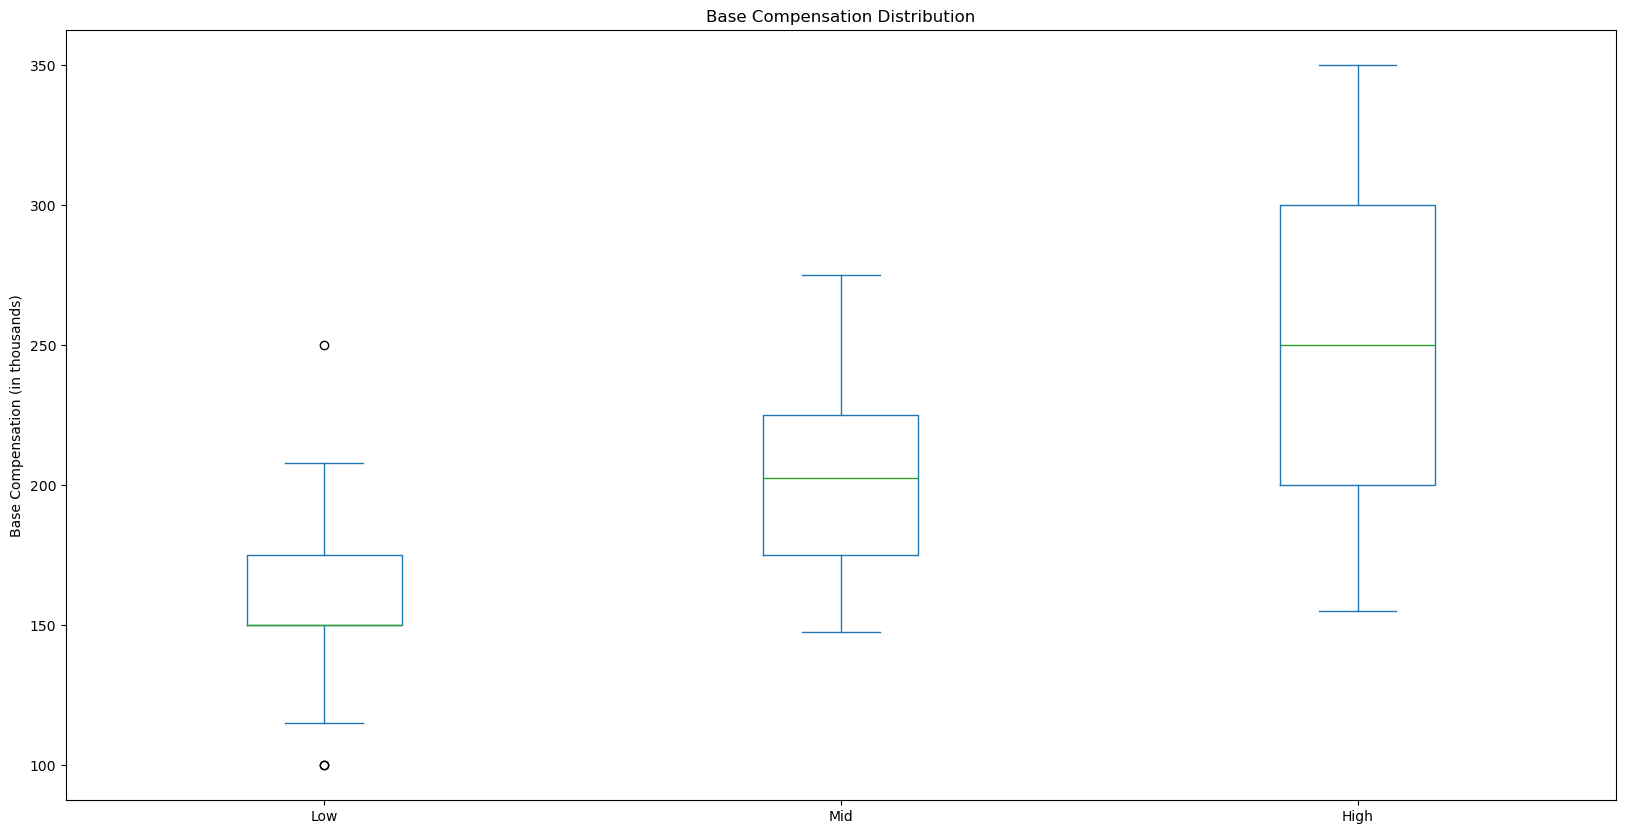

In [ ]:
data.plot(
    kind="box", 
    figsize=(20, 10),
    title="Base Compensation Distribution",
    ylabel="Base Compensation (in thousands)", 
)
plt.show()

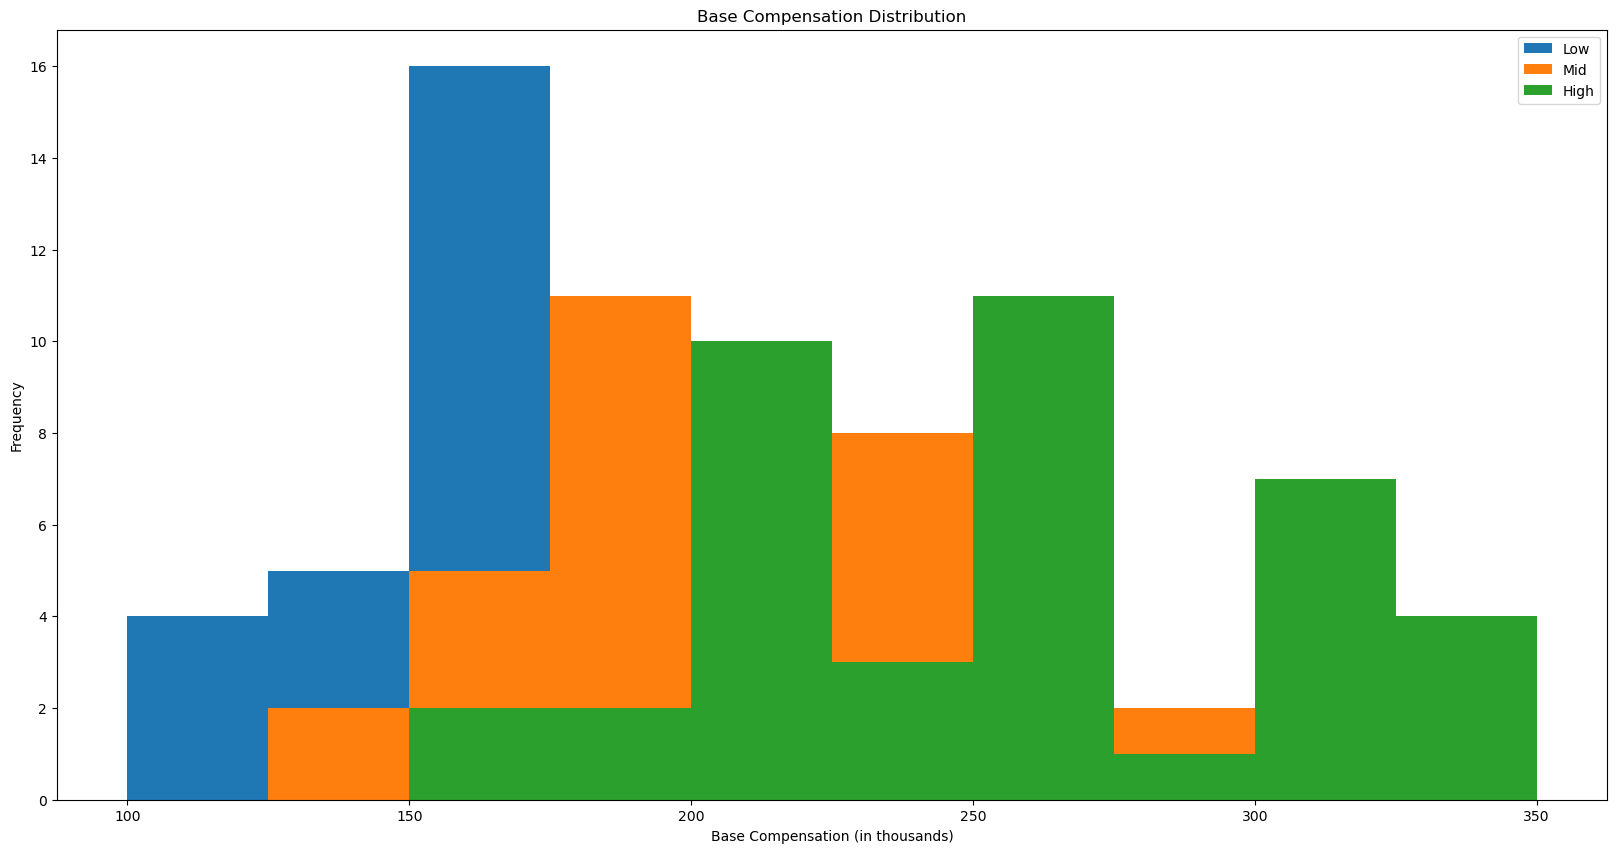

In [87]:
data.plot(
    kind="hist", 
    bins=10, 
    figsize=(20, 10),
    title="Base Compensation Distribution",
    xlabel="Base Compensation (in thousands)" 
)
plt.show()

Bootstrap data

In [14]:
bootstrapped_data: pd.DataFrame = data.apply(lambda x: np.random.choice(a=x, replace=True, size=10_000), axis=0)
bootstrapped_data

,Low,Mid,High
0,175,225.0,300
1,150,275.0,225
2,175,150.0,200
3,140,225.0,300
4,150,225.0,200
...,...,...,...
9995,150,250.0,260
9996,175,275.0,250
9997,200,147.5,200
9998,120,147.5,275


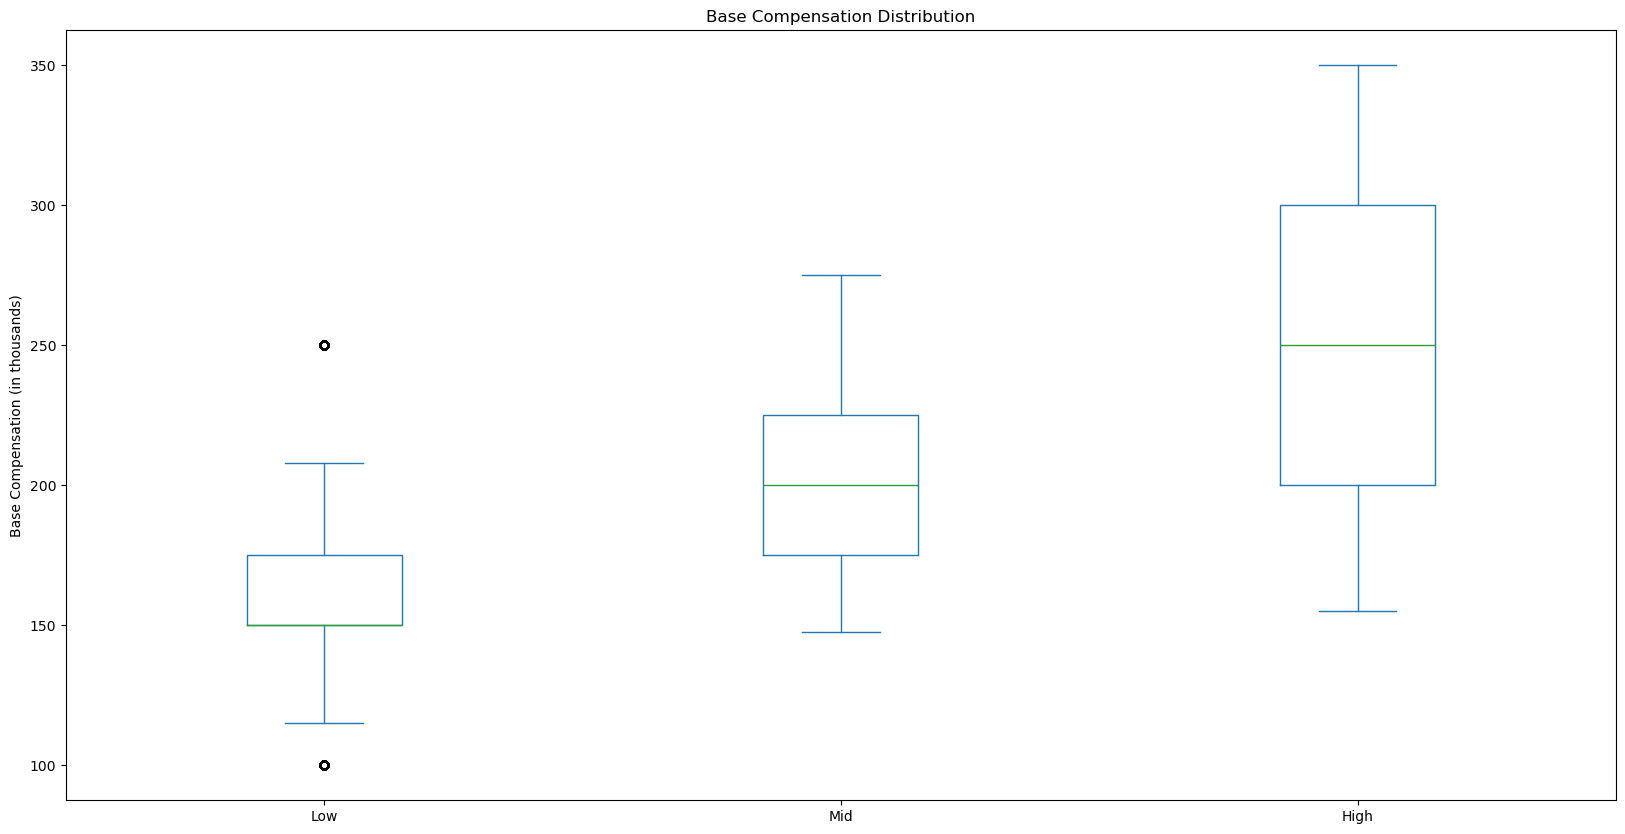

In [88]:
bootstrapped_data.plot(
    kind="box", 
    figsize=(20, 10), 
    title="Base Compensation Distribution",
    ylabel="Base Compensation (in thousands)"
)
plt.show()

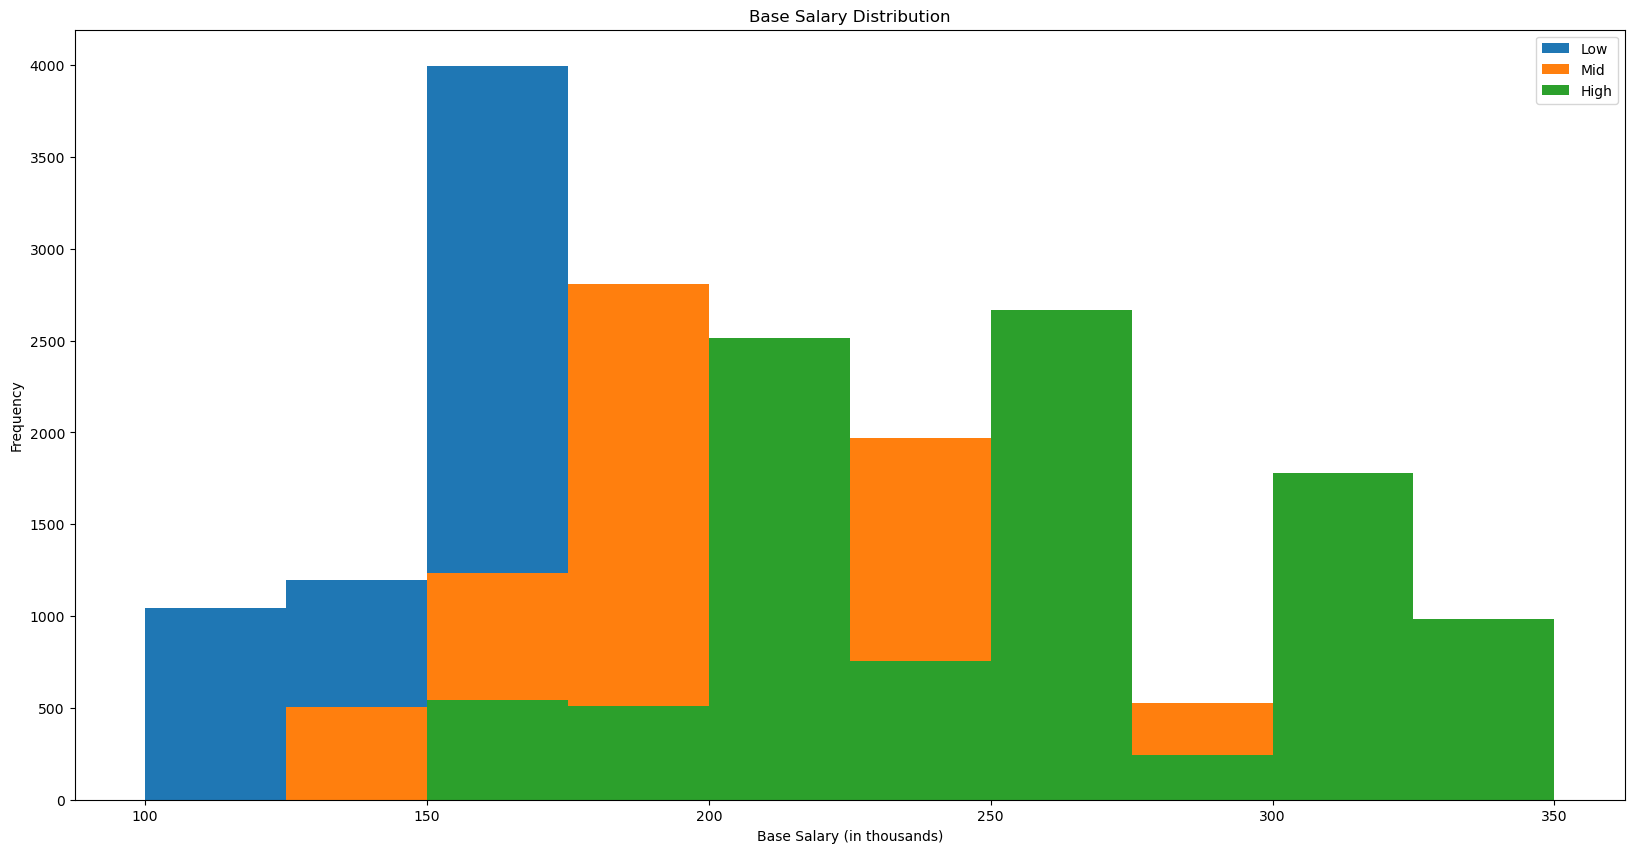

In [ ]:
bootstrapped_data.plot(
    kind="hist", 
    bins=10, 
    figsize=(20, 10),
    xlabel="Base Compensation (in thousands)", 
    title="Base Compensation Distribution"
)
plt.show()

Define bonus percentage frontier

In [65]:
bonus_frontier: np.ndarray = np.linspace(start=0.00, stop=1.0, num=11).round(1)
bonus_frontier_matrix: pd.DataFrame = pd.DataFrame(np.array([bonus_frontier] * bootstrapped_data.shape[0]))
bonus_frontier_matrix

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
2,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
3,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
4,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
9996,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
9997,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
9998,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0


Plot low, mid, and high total compensation frontier 

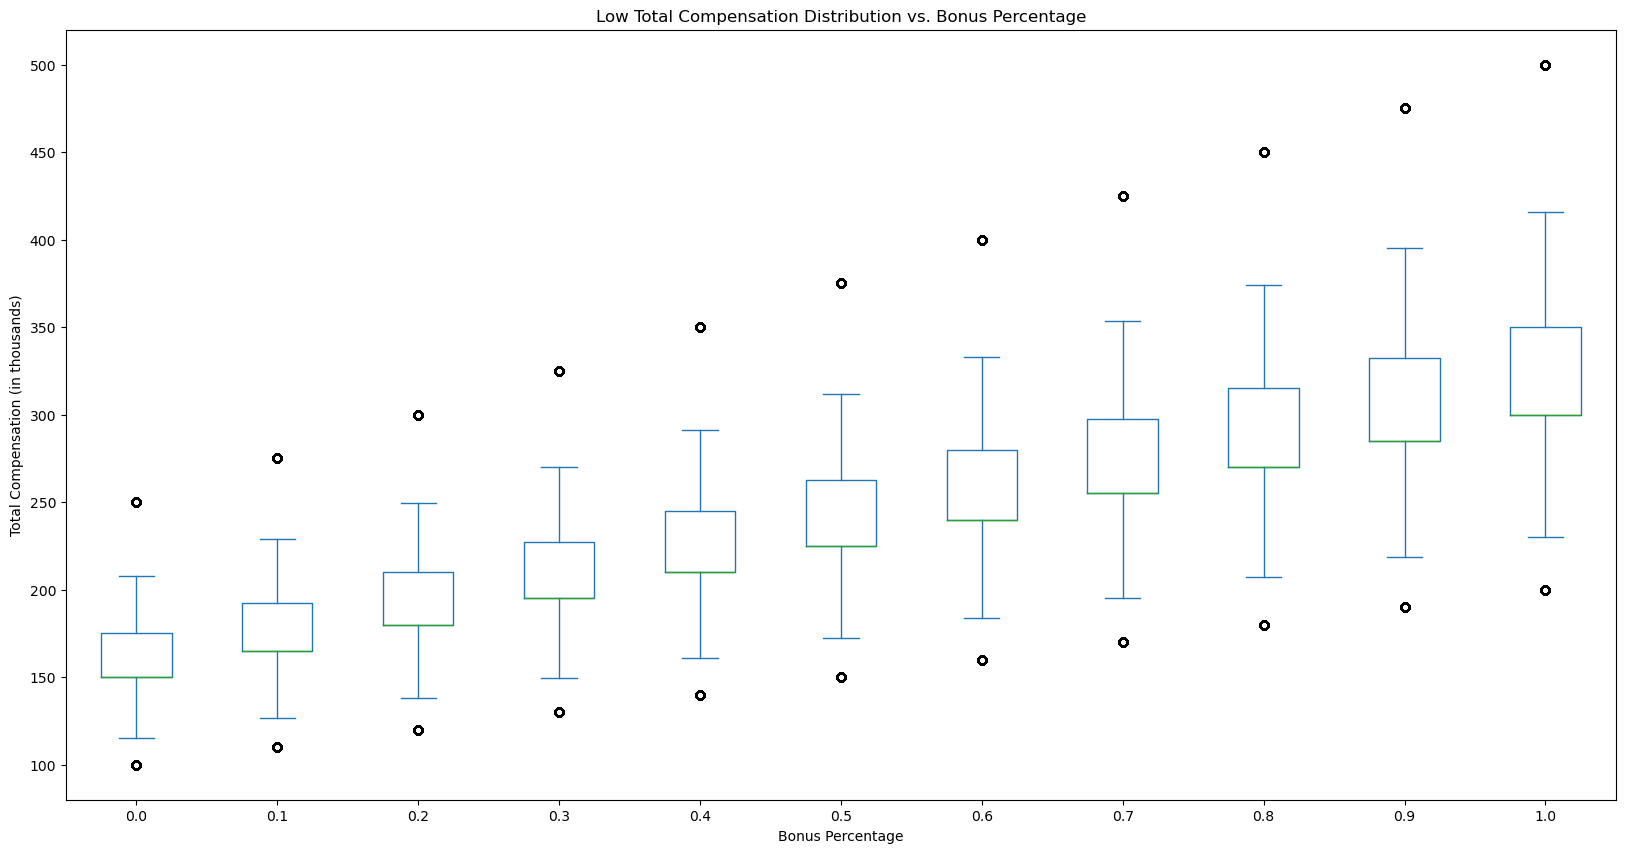

In [90]:
(1 + bonus_frontier_matrix).multiply(bootstrapped_data["Low"], axis=0).plot(
    kind="box",
    figsize=(20, 10),
    xlabel="Bonus Percentage",
    ylabel="Total Compensation (in thousands)",
    title="Low Total Compensation Distribution vs. Bonus Percentage",
)
plt.xticks(ticks=np.arange(start=1, stop=bonus_frontier_matrix.shape[1] + 1, step=1), labels=bonus_frontier)
plt.show()

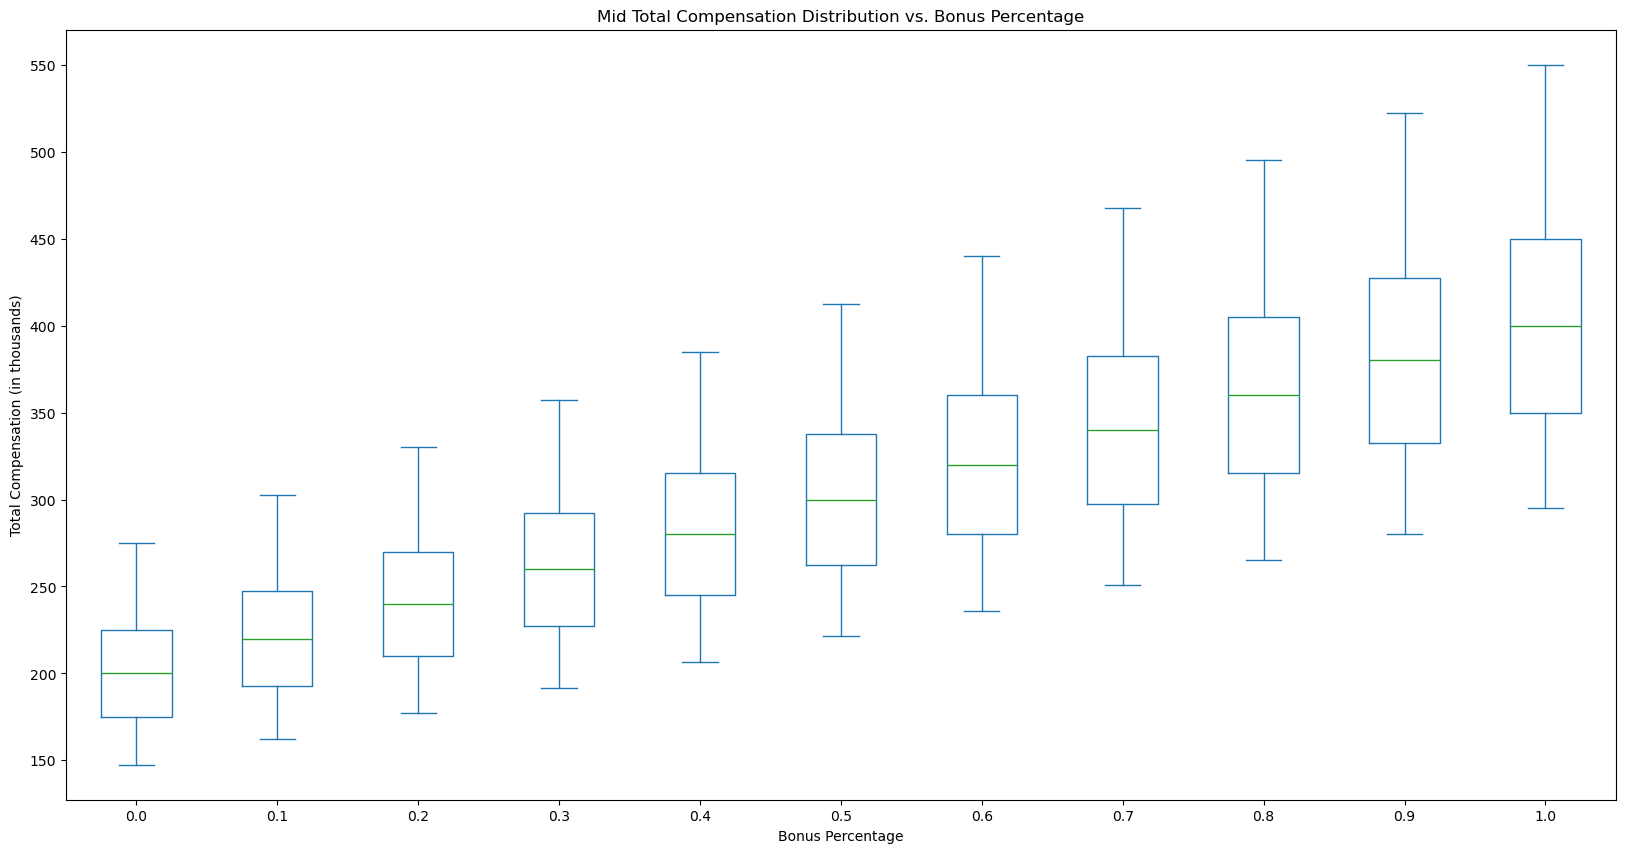

In [81]:
(1 + bonus_frontier_matrix).multiply(bootstrapped_data["Mid"], axis=0).plot(
    kind="box",
    figsize=(20, 10),
    xlabel="Bonus Percentage",
    ylabel="Total Compensation (in thousands)",
    title="Mid Total Compensation Distribution vs. Bonus Percentage",
)
plt.xticks(ticks=np.arange(start=1, stop=bonus_frontier_matrix.shape[1] + 1, step=1), labels=bonus_frontier)
plt.show()

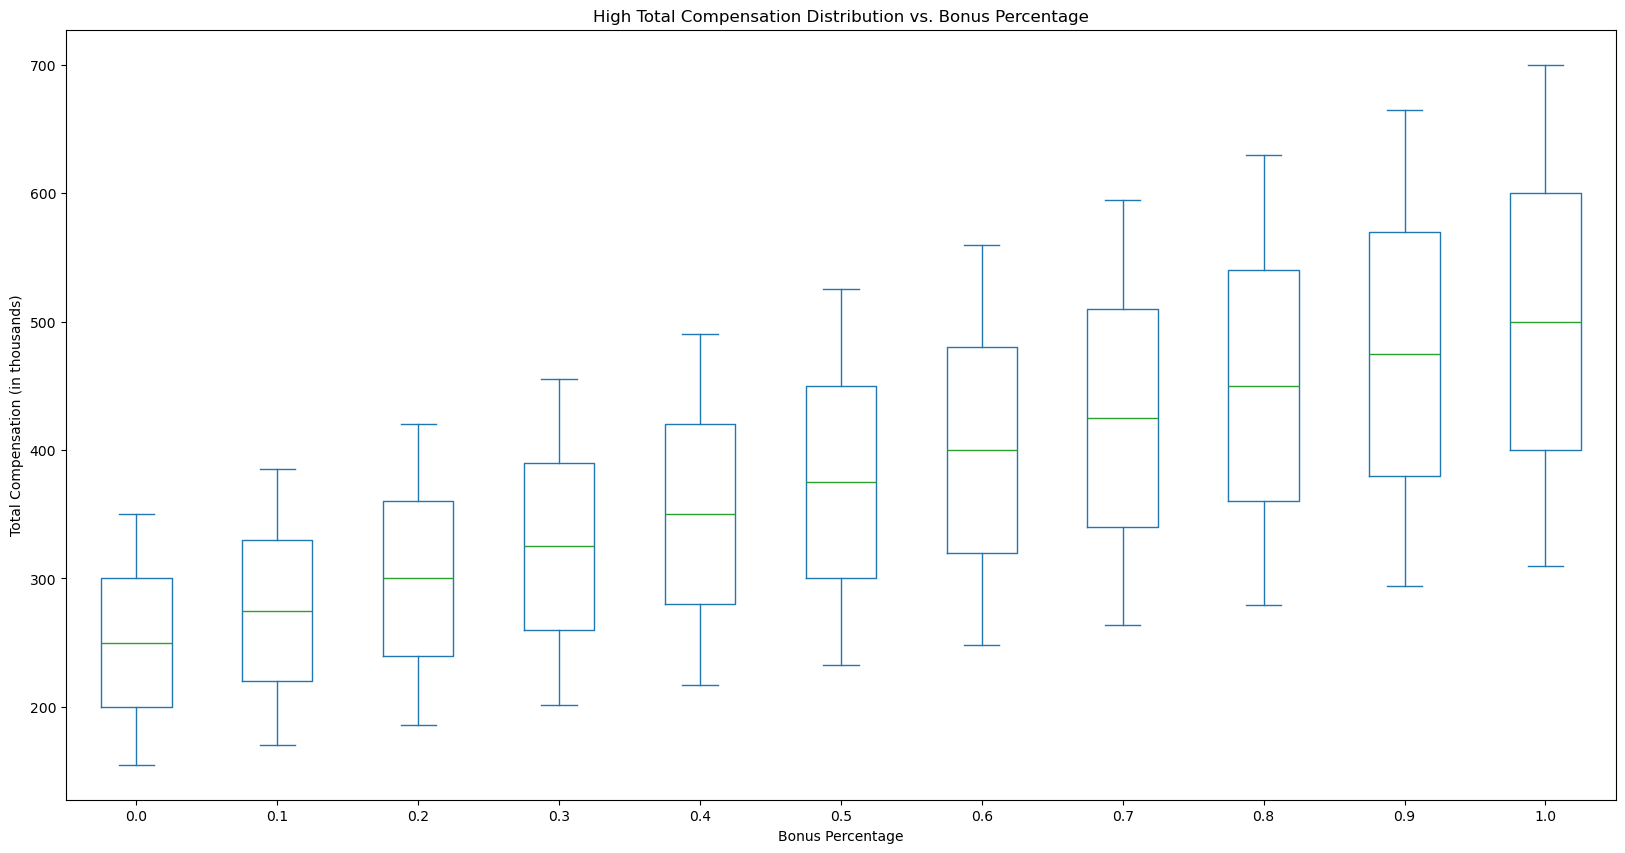

In [82]:
(1 + bonus_frontier_matrix).multiply(bootstrapped_data["High"], axis=0).plot(
    kind="box",
    figsize=(20, 10),
    xlabel="Bonus Percentage",
    ylabel="Total Compensation (in thousands)",
    title="High Total Compensation Distribution vs. Bonus Percentage",
)
plt.xticks(ticks=np.arange(start=1, stop=bonus_frontier_matrix.shape[1] + 1, step=1), labels=bonus_frontier)
plt.show()